In [1]:
import __init__
import matplotlib.pyplot as plt
import numpy as np
from dce import DCE

Using TensorFlow backend.


### Visualize the hardening function 

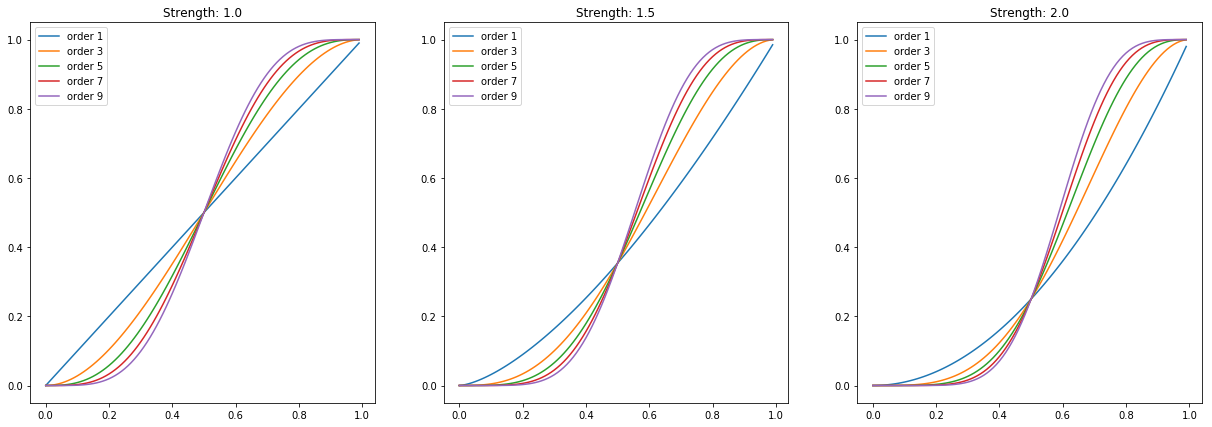

In [16]:
fig, axes = plt.subplots(1,3,figsize=(21,7))

x = np.arange(0,1,0.01)
strength = [1.0, 1.5, 2.0]
for i in range(len(strength)):
    for j in DCE.HARDENING_FUNCS.keys():
        y = DCE.HARDENING_FUNCS[j](x) ** strength[i]
        axes[i].plot(x, y, label='order ' + str(j))
    axes[i].set_title('Strength: ' + str(strength[i]))
    axes[i].legend()

### Creat Random data

In [14]:
a_0 = np.random.random(size=100)
a_1 = np.random.random(size=100)*(1-a_0)
q_2 = np.array([a_0, 1-a_0]).T
q_3 = np.array([a_0, a_1, 1-a_0-a_1]).T

### Cluster = 2 

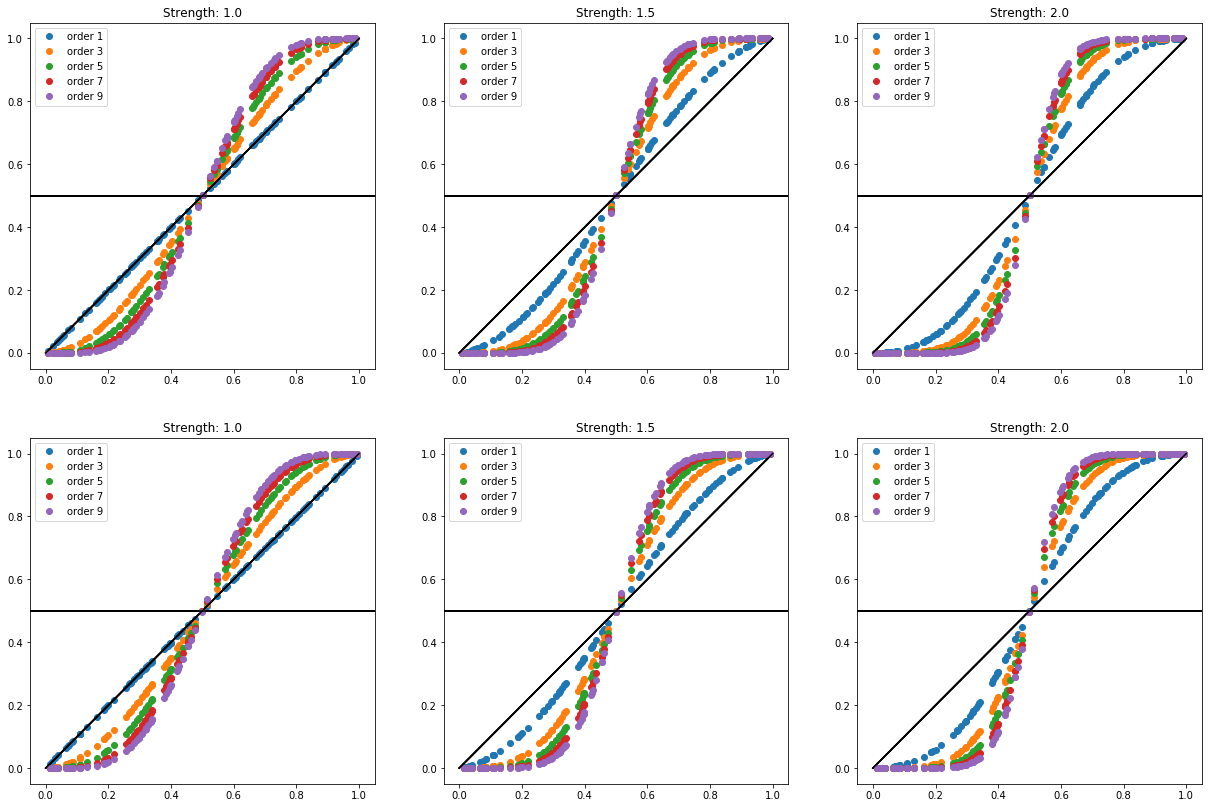

In [27]:
strength = [1.0, 1.5, 2.0]
fig, axes = plt.subplots(2,3,figsize=(21,14))

for i in range(len(strength)):
    for order, h_func in DCE.HARDENING_FUNCS.items():
        p = DCE.hardening(q_2, h_func, strength[i])
        
        for j in range(2):
            axes[j][i].plot(q_2.T[j],p.T[j], 'o', label='order ' + str(order))
            axes[j][i].axhline(0.5, c='k')
            axes[j][i].plot([0,1],[0,1],c='k')
            axes[j][i].set_title('Strength: ' + str(strength[i]))
            axes[j][i].legend()


### Cluster = 3 

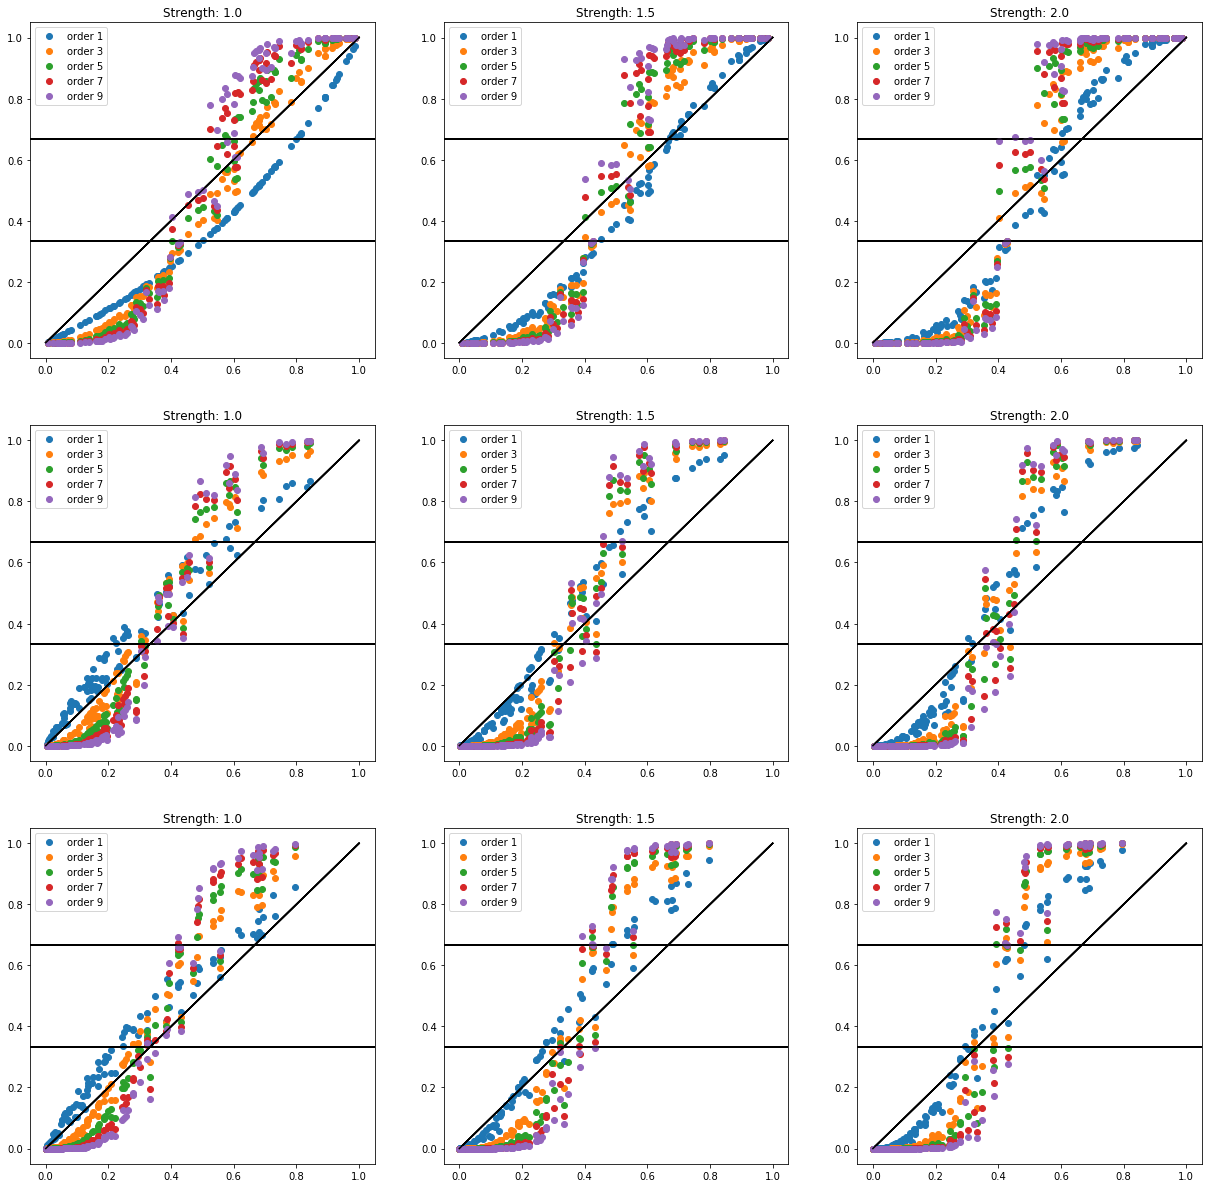

In [31]:
strength = [1.0, 1.5, 2.0]
fig, axes = plt.subplots(3,3,figsize=(21,21))

for i in range(len(strength)):
    for order, h_func in DCE.HARDENING_FUNCS.items():
        p = DCE.hardening(q_3, h_func, strength[i])
        
        for j in range(3):
            axes[j][i].plot(q_3.T[j],p.T[j], 'o', label='order ' + str(order))
            axes[j][i].axhline(0.333333, c='k')
            axes[j][i].axhline(0.666667, c='k')
            axes[j][i].plot([0,1],[0,1],c='k')
            axes[j][i].set_title('Strength: ' + str(strength[i]))
            axes[j][i].legend()